# IN THIS NOTEBOOK, THERE ARE SOME EARLY EXERCISES AT THE TOP, THEN THE IRIS, TITANIC, AND TELCO EXERCISES ARE SPLIT RESPECTIVELY

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics
import seaborn as sns
import env
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#from pydataset: data('')
#from seaborn: sns.load_dataset('')

### 4. In a jupyter notebook, `classification_exercises.ipynb`, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, `df_iris`, from this data.

    - print the first 3 rows

In [2]:
df_iris = sns.load_dataset('iris')
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


    - print the number of rows and columns (shape)

In [3]:
df_iris.shape

(150, 5)

    - print the column names

In [4]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

    - print the data type of each column

In [5]:
df_iris.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [6]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

    - print the summary statistics for each of the numeric variables. Would you
      recommend rescaling the data based on these statistics?

In [7]:
stats = df_iris.describe().T
stats
# no need to rescale, all scales the same. Ravinder says we will address in detail later

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [8]:
stats['range'] = stats['max'] - stats['min']
stats

,count,mean,std,min,25%,50%,75%,max,range
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,3.6
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,2.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,5.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,2.4


### 5. Read the `Table1_CustDetails` table from the `Excel_Exercises.xlsx` file into a dataframe named `df_excel`.

In [9]:
df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name="Table1_CustDetails")
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,Unnamed: 13
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,NaN,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,NaN,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,NaN,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,NaN,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,NaN,NaN


    - assign the first 100 rows to a new dataframe, `df_excel_sample`

In [10]:
df_excel_sample = pd.read_excel('Excel_Exercises.xlsx', nrows= 100)
df_excel_sample



,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,Unnamed: 13
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No,NaN,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No,NaN,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes,NaN,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,NaN,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,NaN,NaN
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No,NaN,NaN
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No,NaN,NaN
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,No,NaN,NaN
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No,NaN,NaN
9,0016-QLJIS,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,No,NaN,NaN


    - print the number of rows of your original dataframe

In [11]:
df_excel.shape[0]

7049

    - print the first 5 column names

In [12]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

    - print the column names that have a data type of `object`

In [13]:
df_excel.select_dtypes('object')

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes
...,...,...,...,...,...,...
7044,9987-LUTYD,Female,No,No,Mailed check,No
7045,9992-RRAMN,Male,Yes,No,Electronic check,Yes
7046,9992-UJOEL,Male,No,No,Mailed check,No
7047,9993-LHIEB,Male,Yes,Yes,Mailed check,No


In [14]:
df_excel.select_dtypes('object').columns.tolist()

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [15]:
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
Unnamed: 12          float64
Unnamed: 13          float64
dtype: object


    - compute the range for each of the numeric variables.

In [16]:
df_excel.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,Unnamed: 12,Unnamed: 13
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000,0.0,0.0
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883,NaN,NaN
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,NaN,NaN
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500,NaN,NaN
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000,NaN,NaN
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000,NaN,NaN
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000,NaN,NaN


In [17]:
monthly_charges_range = df_excel.monthly_charges.max() - df_excel.monthly_charges.min()
monthly_charges_range

100.5

In [18]:
total_charges_range = df_excel.total_charges.max() - df_excel.total_charges.min()
total_charges_range

8666.0

In [19]:
telco_stats = df_excel.describe().T
telco_stats

,count,mean,std,min,25%,50%,75%,max
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80
Unnamed: 12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
telco_stats['range'] = telco_stats['max'] - telco_stats['min']
telco_stats

,count,mean,std,min,25%,50%,75%,max,range
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00,1.0
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00,2.0
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00,2.0
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00,2.0
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0
Unnamed: 12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 6. Read the data from [this google sheet](https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing) into a dataframe, `df_google`

    

In [21]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'   

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
csv_export_url

'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv&gid=341089357'

In [22]:
df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


    - print the first 3 rows
    

In [23]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


    - print the number of rows and columns
    

In [24]:
df_google.shape

(891, 12)

    - print the column names
    

In [25]:
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

    - print the data type of each column
    

In [26]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

    - print the summary statistics for each of the numeric variables
    

In [27]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


    - print the unique values for each of your categorical variables

In [28]:
# for col in df_google:
#     print(df_google[col].unique())

In [29]:
# df_google.nunique(axis = 0)

In [30]:
pd.CategoricalIndex(df_google.Name), pd.CategoricalIndex(df_google.Survived), pd.CategoricalIndex(df_google.Pclass), pd.CategoricalIndex(df_google.Sex), pd.CategoricalIndex(df_google.Embarked)

(CategoricalIndex(['Braund, Mr. Owen Harris',
                   'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
                   'Heikkinen, Miss. Laina',
                   'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
                   'Allen, Mr. William Henry', 'Moran, Mr. James',
                   'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
                   'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
                   'Nasser, Mrs. Nicholas (Adele Achem)',
                   ...
                   'Markun, Mr. Johann', 'Dahlberg, Miss. Gerda Ulrika',
                   'Banfield, Mr. Frederick James', 'Sutehall, Mr. Henry Jr',
                   'Rice, Mrs. William (Margaret Norton)',
                   'Montvila, Rev. Juozas', 'Graham, Miss. Margaret Edith',
                   'Johnston, Miss. Catherine Helen "Carrie"',
                   'Behr, Mr. Karl Howell', 'Dooley, Mr. Patrick'],
                  categories=['Abbing, Mr. Anthony'

In [31]:
# df_google.sample(20)

In [32]:
# pd.CategoricalIndex(df_google.Sex, )

In [33]:
category_list = list(df_google.select_dtypes(include = 'object').columns)#.append('Pclass')
category_list.append('Pclass')
category_list

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']

In [34]:
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

# Using the Iris Data:

### Use the function defined in acquire.py to load the iris data.

In [35]:
import acquire

In [36]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [37]:
iris_df.shape

(150, 6)

In [38]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    150 non-null    int64  
 1   species_name  150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [39]:
iris_df.describe()

,species_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,5.843333,3.057333,3.758000,1.199333
std,0.819232,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,6.400000,3.300000,5.100000,1.800000
max,3.000000,7.900000,4.400000,6.900000,2.500000


In [40]:
num_cols = iris_df.columns[[iris_df[col].dtype == 'float64' for col in iris_df.columns]]
num_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

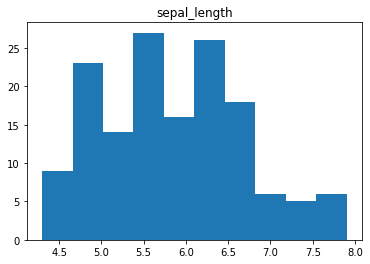

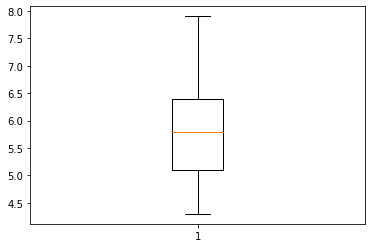

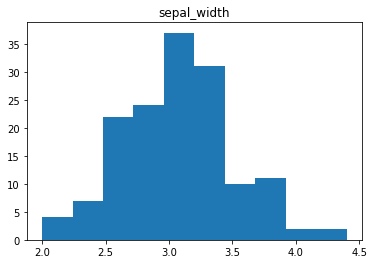

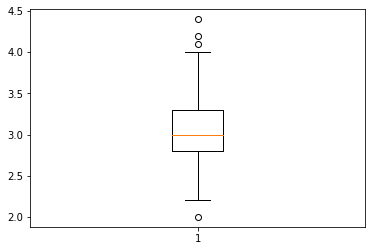

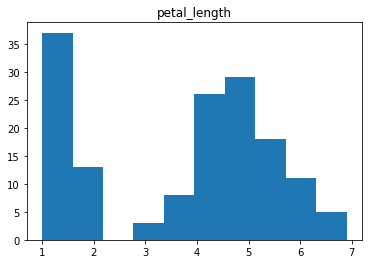

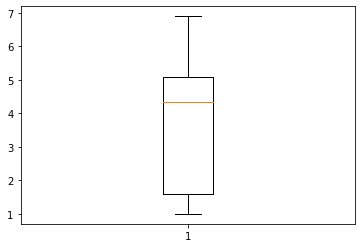

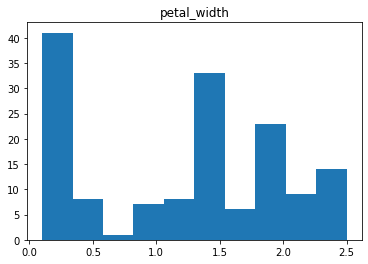

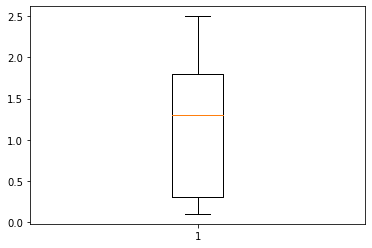

In [41]:
for col in num_cols:
    plt.hist(iris_df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(iris_df[col])
    plt.show()

In [42]:
obj_cols = iris_df.columns[[iris_df[col].dtype == 'O' for col in iris_df.columns]]
obj_cols

Index(['species_name'], dtype='object')

In [43]:
for col in obj_cols:
    print(iris_df[col].value_counts())
    print(iris_df[col].value_counts(normalize = True, dropna=False))
    print('------------------------')
        

virginica     50
versicolor    50
setosa        50
Name: species_name, dtype: int64
virginica     0.333333
versicolor    0.333333
setosa        0.333333
Name: species_name, dtype: float64
------------------------


In [44]:
iris_df.sample()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
67,2,versicolor,5.8,2.7,4.1,1.0


### Drop the species_id and measurement_id columns.

In [45]:
cols_to_drop = ['species_id']
iris_df = iris_df.drop(columns = cols_to_drop)
iris_df.shape

(150, 5)

### Rename the species_name column to just species.

In [46]:
iris_df.rename(columns={'species_name': 'species'}, inplace=True)
iris_df.iloc[105]

species         virginica
sepal_length          7.6
sepal_width           3.0
petal_length          6.6
petal_width           2.1
Name: 105, dtype: object

### Create dummy variables of the species name and concatenate onto the iris dataframe.

In [47]:
dummy_df = pd.get_dummies(iris_df[['species']], dummy_na=False, drop_first=[True,True])
dummy_df.sample()

,species_versicolor,species_virginica
147,0,1


In [48]:
iris_df = pd.concat([iris_df, dummy_df], axis = 1)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [49]:
def prep_iris(iris_df):
    '''
    tranforms iris data set by dropping, renaming, adding columns
    '''
    iris_df = acquire.get_iris_data()
    cols_to_drop = ['species_id']
    iris_df = iris_df.drop(columns = cols_to_drop)
    iris_df.rename(columns={'species_name': 'species'}, inplace=True)
    dummy_df = pd.get_dummies(iris_df[['species']], dummy_na=False, drop_first=[True,True])
    iris_df = pd.concat([iris_df, dummy_df], axis = 1)

    return iris_df



In [50]:
# iris_df = acquire.get_iris_data()
# iris_df.head()

# 1. Acquire, prepare & split your data. (exploratory analysis lesson)

In [51]:
iris_df = prep_iris(iris_df)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [97]:
def split_data(iris_df):
    '''
    Takes in iris DF and returns train, validate, test sbusert dataframes
    '''
    iris_train, iris_test = train_test_split(iris_df, test_size = .2, stratify=iris_df.species)
    iris_train, iris_validate = train_test_split(iris_train, test_size=.3, stratify=iris_train.species)
    return iris_train, iris_validate, iris_test

In [101]:
iris_train, iris_validate, iris_test = split_data(iris_df)
print(f'iris_train: {iris_train.shape}')
print(f'iris_validate: {iris_validate.shape}')
print(f'iris_test: {iris_test.shape}')

# as you can see, we now have split the data into 3 sets

iris_train: (84, 7)
iris_validate: (36, 7)
iris_test: (30, 7)


# Univariate Stats
### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [102]:
iris_train.sample()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
48,setosa,5.3,3.7,1.5,0.2,0,0


In [103]:
iris_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 64 to 4
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             84 non-null     object 
 1   sepal_length        84 non-null     float64
 2   sepal_width         84 non-null     float64
 3   petal_length        84 non-null     float64
 4   petal_width         84 non-null     float64
 5   species_versicolor  84 non-null     uint8  
 6   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


In [104]:
iris_train.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.816667,3.030952,3.726190,1.198810,0.333333,0.333333
std,0.790430,0.432693,1.736158,0.777158,0.474236,0.474236
min,4.400000,2.000000,1.200000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.500000,0.275000,0.000000,0.000000
50%,5.750000,3.000000,4.200000,1.300000,0.000000,0.000000
75%,6.400000,3.225000,5.100000,1.825000,1.000000,1.000000
max,7.900000,4.200000,6.700000,2.500000,1.000000,1.000000


In [105]:
num_cols = iris_train.columns[[iris_train[col].dtype == 'float64' for col in iris_df.columns]]
num_cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

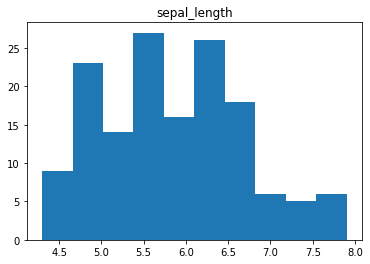

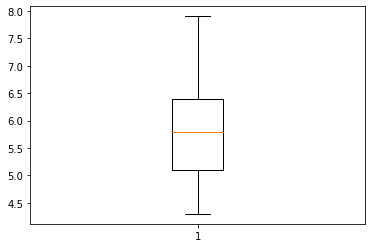

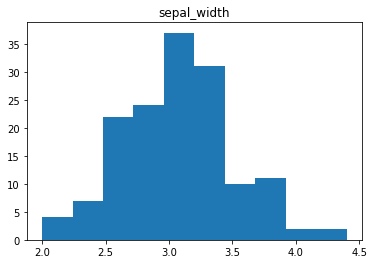

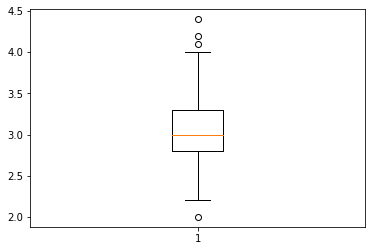

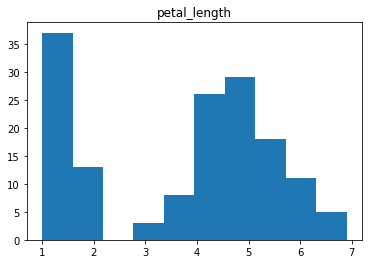

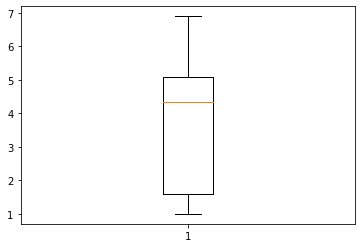

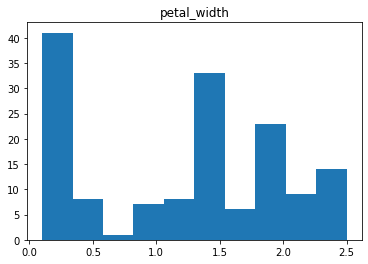

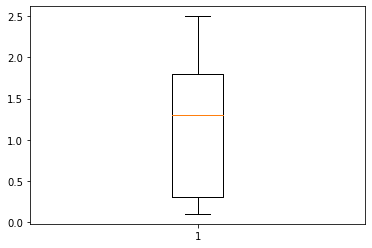

In [106]:
for col in num_cols:
    plt.hist(iris_df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(iris_df[col])
    plt.show()

### For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [110]:
iris_train.species.value_counts()

virginica     28
setosa        28
versicolor    28
Name: species, dtype: int64

In [111]:
virginica = iris_train[iris_train.species == 'virginica']
setosa = iris_train[iris_train.species == 'setosa']
versicolor = iris_train[iris_train.species == 'versicolor']

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>],
       [<AxesSubplot:title={'center':'species_versicolor'}>,
        <AxesSubplot:title={'center':'species_virginica'}>]], dtype=object)

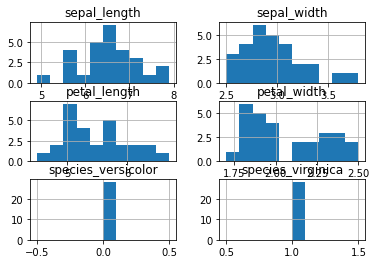

In [113]:
virginica.hist()

# takeaways:
# for viriginica, sepal length and width are relatively normal
# petal lenght and width aren't so normal

<AxesSubplot:>

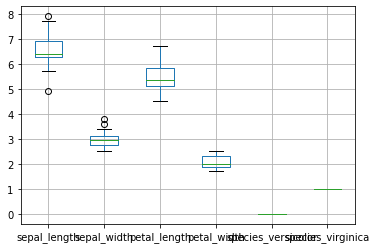

In [117]:
virginica.boxplot()
# note how the different measureable values are all over. relation btwn sepal lenght and width? petal?

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>],
       [<AxesSubplot:title={'center':'species_versicolor'}>,
        <AxesSubplot:title={'center':'species_virginica'}>]], dtype=object)

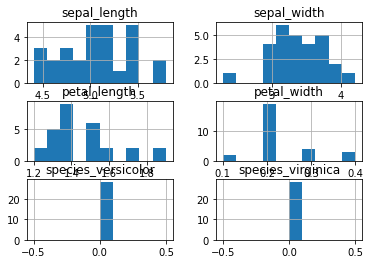

In [114]:
setosa.hist()
# setosa takeways...petal widths are kind of discrete seeming. 
# all categories are sort of less normal distributed

<AxesSubplot:>

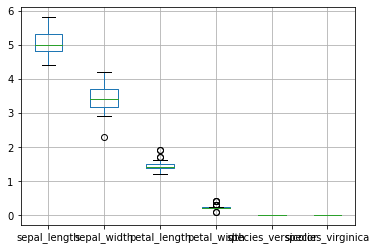

In [118]:
setosa.boxplot()
# all going down...no relation btwn each other, but maybe an identifying point related to virginica?

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>],
       [<AxesSubplot:title={'center':'species_versicolor'}>,
        <AxesSubplot:title={'center':'species_virginica'}>]], dtype=object)

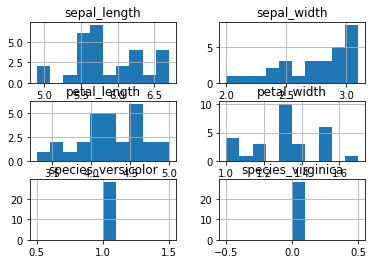

In [115]:
versicolor.hist()
#versicolor takeaways: similar as with setosa

<AxesSubplot:>

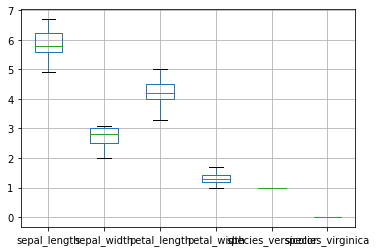

In [119]:
versicolor.boxplot()
# similar to what we saw on virginica

### Document takeaways & any actions

- see above

# Bivariate Stats

### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).


### For each measurement type, compute the descriptive statistics for each species

In [120]:
iris_train.head(1)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
64,versicolor,5.6,2.9,3.6,1.3,1,0


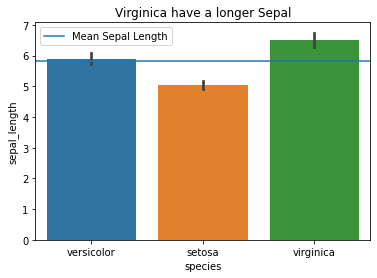

In [122]:
plt.title("Virginica have a longer Sepal")
sns.barplot(x="species", y="sepal_length", data=iris_train)
mean_sepal_length = iris_train.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Mean Sepal Length")
plt.legend()
plt.show()

In [132]:
iris_train.sepal_length.describe()

count    84.000000
mean      5.816667
std       0.790430
min       4.400000
25%       5.100000
50%       5.750000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

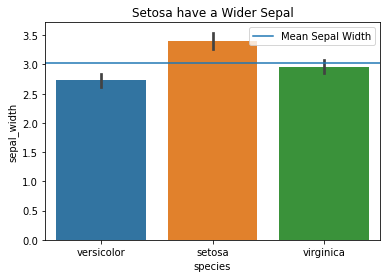

In [125]:
plt.title("Setosa have a Wider Sepal")
sns.barplot(x="species", y="sepal_width", data=iris_train)
mean_sepal_width = iris_train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean Sepal Width")
plt.legend()
plt.show()

In [133]:
iris_train.sepal_width.describe()

count    84.000000
mean      3.030952
std       0.432693
min       2.000000
25%       2.800000
50%       3.000000
75%       3.225000
max       4.200000
Name: sepal_width, dtype: float64

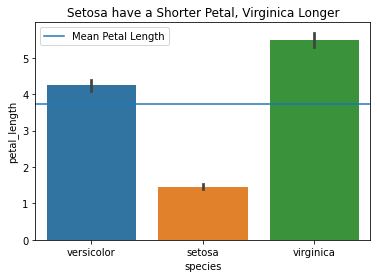

In [129]:
plt.title("Setosa have a Shorter Petal, Virginica Longer")
sns.barplot(x="species", y="petal_length", data=iris_train)
mean_petal_length = iris_train.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean Petal Length")
plt.legend()
plt.show()

In [134]:
iris_train.petal_length.describe()

count    84.000000
mean      3.726190
std       1.736158
min       1.200000
25%       1.500000
50%       4.200000
75%       5.100000
max       6.700000
Name: petal_length, dtype: float64

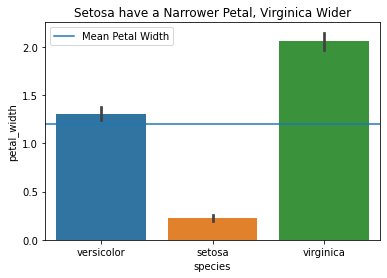

In [131]:
plt.title("Setosa have a Narrower Petal, Virginica Wider")
sns.barplot(x="species", y="petal_width", data=iris_train)
mean_petal_width = iris_train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean Petal Width")
plt.legend()
plt.show()

In [135]:
iris_train.petal_width.describe()

count    84.000000
mean      1.198810
std       0.777158
min       0.100000
25%       0.275000
50%       1.300000
75%       1.825000
max       2.500000
Name: petal_width, dtype: float64

# Using the Titanic dataset

### Use the function defined in acquire.py to load the Titanic data.

In [52]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


### Drop any unnecessary, unhelpful, or duplicated columns.

In [53]:
import prepare

In [54]:
titanic_df = prepare.clean_data(titanic_df)

In [55]:
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [56]:
#whoops already did that in the step above

### Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [57]:
def prep_titanic(titanic_df):
    '''
    This function will clean the data etc etc...
    '''
    
    titanic_df = titanic_df.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    titanic_df = titanic_df.drop(columns = cols_to_drop)
    titanic_df['embark_town'] = titanic_df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], dummy_na=False, drop_first=[True,True])
    titanic_df = pd.concat([titanic_df, dummy_df], axis = 1)
    return titanic_df

In [58]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [59]:
titanic_df = prep_titanic(titanic_df)
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


# Using the Telco dataset

### Use the function defined in acquire.py to load the Telco data.

In [60]:
telco_df = acquire.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [61]:
telco_df.shape

(7043, 24)

In [62]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [63]:
telco_df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [64]:
num_cols = telco_df.columns[[telco_df[col].dtype in ('int64', 'float64') for col in telco_df.columns]]
num_cols

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges'],
      dtype='object')

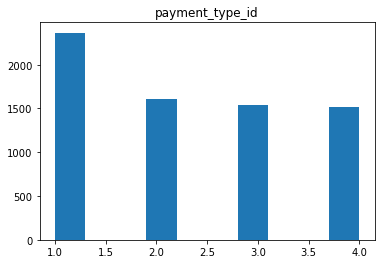

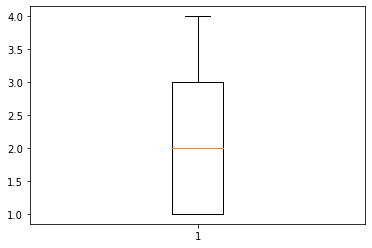

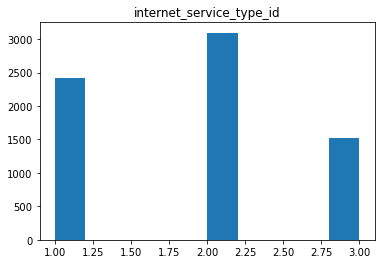

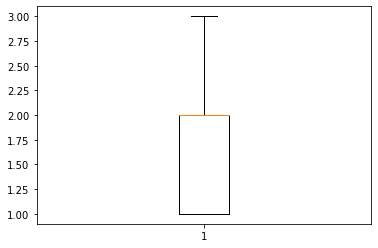

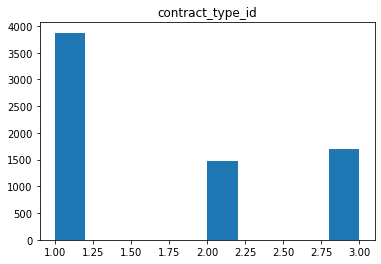

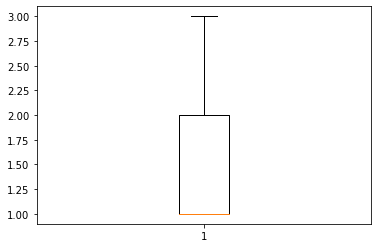

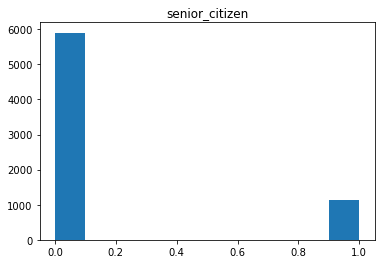

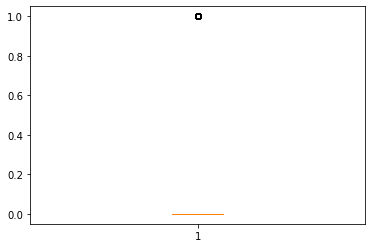

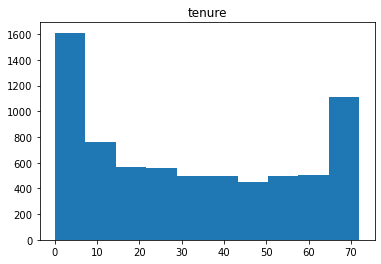

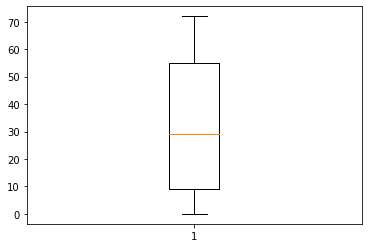

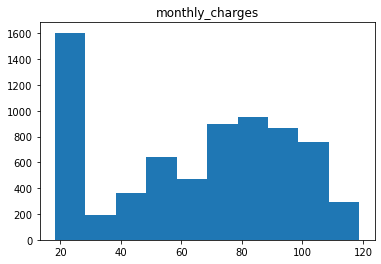

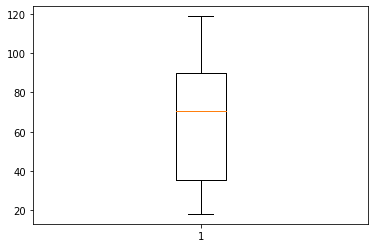

In [65]:
for col in num_cols:
    plt.hist(telco_df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(telco_df[col])
    plt.show()

In [66]:
obj_cols = telco_df.columns[[telco_df[col].dtype == 'O' for col in telco_df.columns]]
obj_cols

Index(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'total_charges', 'churn', 'contract_type',
       'internet_service_type', 'payment_type'],
      dtype='object')

In [67]:
for col in obj_cols:
    print(telco_df[col].value_counts())
    print(telco_df[col].value_counts(normalize = True, dropna=False))
    print('------------------------')
        

2189-UXTKY    1
9992-UJOEL    1
5982-PSMKW    1
1334-FJSVR    1
1302-TPUBN    1
             ..
9227-UAQFT    1
7748-UMTRK    1
1335-HQMKX    1
1952-DVVSW    1
6701-YVNQG    1
Name: customer_id, Length: 7043, dtype: int64
2189-UXTKY    0.000142
9992-UJOEL    0.000142
5982-PSMKW    0.000142
1334-FJSVR    0.000142
1302-TPUBN    0.000142
                ...   
9227-UAQFT    0.000142
7748-UMTRK    0.000142
1335-HQMKX    0.000142
1952-DVVSW    0.000142
6701-YVNQG    0.000142
Name: customer_id, Length: 7043, dtype: float64
------------------------
Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
------------------------
No     3641
Yes    3402
Name: partner, dtype: int64
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
------------------------
No     4933
Yes    2110
Name: dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
------------------------
Yes    6361
No     

In [68]:
telco_df.monthly_charges.value_counts(bins=5, sort=False)

(18.148999999999997, 38.35]    1797
(38.35, 58.45]                 1005
(58.45, 78.55]                 1367
(78.55, 98.65]                 1826
(98.65, 118.75]                1048
Name: monthly_charges, dtype: int64

In [69]:
missing = telco_df.isnull().sum()
missing[missing > 0]
# no null values in the dataset.  

Series([], dtype: int64)

In [70]:
telco_df.sample()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
2308,2,1,1,8976-OQHGT,Female,0,Yes,Yes,4,Yes,...,Yes,No,No,No,56.5,235.1,Yes,Month-to-month,DSL,Mailed check


### Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [71]:
# total charges is a string that needs to be converted to float
# 0   payment_type_id           7043 non-null   int64   DROP IT
# 1   internet_service_type_id  7043 non-null   int64   DROP IT
# 2   contract_type_id          7043 non-null   int64   DROP IT
# 3   customer_id               7043 non-null   object  
# 4   gender                    7043 non-null   object  NEED TO DUMMY
# 5   senior_citizen            7043 non-null   int64   NEED TO DUMMY
# 6   partner                   7043 non-null   object  DUMMY IT
# 7   dependents                7043 non-null   object  DUMMY IT
# 8   tenure                    7043 non-null   int64  
# 9   phone_service             7043 non-null   object  DUMMY.....YES/NO....'HAS_PHONE_SVC'
# 10  multiple_lines            7043 non-null   object  DUMMY IT--THIS HAS 3 POSSIBLE VALUES
# 11  online_security           7043 non-null   object  DITTO 
# 12  online_backup             7043 non-null   object  DITTO
# 13  device_protection         7043 non-null   object  DITTO
# 14  tech_support              7043 non-null   object  DITTO
# 15  streaming_tv              7043 non-null   object  DITTO
# 16  streaming_movies          7043 non-null   object  DITTO
# 17  paperless_billing         7043 non-null   object  YES/NO....DUMMY IT
# 18  monthly_charges           7043 non-null   float64
# 19  total_charges             7043 non-null   object  CONVERT TO FLOAT. ALSO...WE HAVE MISSING VALUES :(
# 20  churn                     7043 non-null   object  DUMMY
# 21  contract_type             7043 non-null   object  3 OPTIONS, DUMMY IT
# 22  internet_service_type     7043 non-null   object  SAME
# 23  payment_type              7043 non-null   object  4 OPTIONS, DUMMY?

In [72]:
# drop any possible duplicates, of which there weren't any
print(telco_df.shape)
telco_df = telco_df.drop_duplicates()
print(telco_df.shape)

(7043, 24)
(7043, 24)


In [73]:
cols_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
telco_df = telco_df.drop(columns = cols_to_drop)
telco_df.shape

(7043, 21)

In [74]:
telco_df.total_charges.iloc[85]
#there seems to be a missing value here, who knows where ielse

' '

In [75]:
missing = telco_df.isnull().sum()
missing[missing > 0]
# according to this, there are no missing values

Series([], dtype: int64)

In [76]:
#ok, it turns out there are 11 rows with no total_charge value:
telco_df.total_charges[(telco_df.total_charges == ' ')]

85       
156      
236      
255      
339      
5681     
5717     
5727     
5798     
6007     
6257     
Name: total_charges, dtype: object

In [77]:
# so let's take a stab at filling " " values with 0
telco_df.total_charges.replace(' ',0, inplace=True)
print(telco_df.total_charges.iloc[85])
print(telco_df.total_charges[(telco_df.total_charges == ' ')])
# ok looks like that did the trick

0
Series([], Name: total_charges, dtype: object)


In [78]:
# i'm going to get total_charges into float format here:
telco_df.total_charges = telco_df.total_charges.astype(float)
print(telco_df.total_charges.iloc[85])

# done, finally. '.info' is showing total_charges as float64 now

0.0


In [79]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [80]:
# 4   gender                    7043 non-null   object  NEED TO DUMMY
# 5   senior_citizen            7043 non-null   int64   NEED TO DUMMY
# 6   partner                   7043 non-null   object  DUMMY IT
# 7   dependents                7043 non-null   object  DUMMY IT
# 9   phone_service             7043 non-null   object  DUMMY.....YES/NO....'HAS_PHONE_SVC'
# 10  multiple_lines            7043 non-null   object  DUMMY IT--THIS HAS 3 POSSIBLE VALUES
# 11  online_security           7043 non-null   object  DITTO 
# 12  online_backup             7043 non-null   object  DITTO
# 13  device_protection         7043 non-null   object  DITTO
# 14  tech_support              7043 non-null   object  DITTO
# 15  streaming_tv              7043 non-null   object  DITTO
# 16  streaming_movies          7043 non-null   object  DITTO
# 17  paperless_billing         7043 non-null   object  YES/NO....DUMMY IT
# 20  churn                     7043 non-null   object  DUMMY
# 21  contract_type             7043 non-null   object  3 OPTIONS, DUMMY IT
# 22  internet_service_type     7043 non-null   object  SAME
# 23  payment_type              7043 non-null   object  4 OPTIONS, DUMMY?

In [81]:
cols_to_dummy = telco_df[['gender','senior_citizen','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']]
dummy_df = pd.get_dummies(cols_to_dummy, dummy_na=False, drop_first=[True,True])
print(dummy_df.shape)
dummy_df


(7043, 28)


,senior_citizen,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,1,1,1,0,1,0,1,0,...,1,1,0,0,1,0,0,0,0,1
1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,1,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,1,0,1,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
7039,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
7040,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
7041,0,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [82]:
telco_df = pd.concat([telco_df, dummy_df], axis = 1)
print(telco_df.shape)
telco_df.head()

(7043, 49)


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,...,1,1,0,0,1,0,0,0,0,1
1,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,...,0,0,0,0,1,0,0,1,0,0
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,...,0,0,0,0,1,0,0,0,0,0
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,...,0,1,0,0,1,0,0,1,0,0
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,...,1,1,0,0,1,0,0,0,0,0


In [83]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

### Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [84]:
# testing my function below...
telco_df = acquire.get_telco_data()

In [85]:
def prep_telco(telco_df):
    telco_df = telco_df.drop_duplicates()
    cols_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
    telco_df = telco_df.drop(columns = cols_to_drop)
    telco_df.total_charges.replace(' ',0, inplace=True)
    telco_df.total_charges = telco_df.total_charges.astype(float)
    cols_to_dummy = telco_df[['gender','senior_citizen','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']]
    dummy_df = pd.get_dummies(cols_to_dummy, dummy_na=False)
    telco_df = pd.concat([telco_df, dummy_df], axis = 1)

    return telco_df


In [86]:
telco_prepped = prep_telco(telco_df)

In [87]:
telco_prepped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7043 non-null   object 
 1   gender                                  7043 non-null   object 
 2   senior_citizen                          7043 non-null   int64  
 3   partner                                 7043 non-null   object 
 4   dependents                              7043 non-null   object 
 5   tenure                                  7043 non-null   int64  
 6   phone_service                           7043 non-null   object 
 7   multiple_lines                          7043 non-null   object 
 8   online_security                         7043 non-null   object 
 9   online_backup                           7043 non-null   object 
 10  device_protection                       7043 non-null   obje

# extra credit: split the data

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [89]:
def split_data(telco_prepped):
    '''
    Takes in a dataframe and returns train, validate, test sbusert dataframes
    '''
    train, test = train_test_split(telco_prepped, test_size = .2, stratify=telco_prepped.churn_Yes)
    train, validate = train_test_split(train, test_size=.3, stratify=train.churn_Yes)
    return train, validate, test



In [90]:
telco_prepped.shape

(7043, 65)

In [91]:
train, validate, test = split_data(telco_prepped)
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (3943, 65)
Validate: (1691, 65)
Test: (1409, 65)


## think about how to structure this so that you don't have to change the name of the df going into the function